<a href="https://colab.research.google.com/github/pavillion69/Airbnb-Data-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 

%matplotlib inline


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
df.shape

(48895, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [16]:
zero_reviewed_listings=df[df['number_of_reviews']==0]
zero_reviewed_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10052 non-null  int64  
 1   name                            10042 non-null  object 
 2   host_id                         10052 non-null  int64  
 3   host_name                       10047 non-null  object 
 4   neighbourhood_group             10052 non-null  object 
 5   neighbourhood                   10052 non-null  object 
 6   latitude                        10052 non-null  float64
 7   longitude                       10052 non-null  float64
 8   room_type                       10052 non-null  object 
 9   price                           10052 non-null  int64  
 10  minimum_nights                  10052 non-null  int64  
 11  number_of_reviews               10052 non-null  int64  
 12  last_review                     

In [18]:
non_zero_review_listins=df[~(df['number_of_reviews']==0)]
non_zero_review_listins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  object 
 5   neighbourhood                   38843 non-null  object 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review                     

In [22]:
zero_reviewed_listings.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10052.0,NaN,NaN,NaN,22574844.585555,11355626.19826,3647.0,12084042.0,23377571.0,34020916.5,36487245.0
name,10042,9884,Hillside Hotel,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,10052.0,NaN,NaN,NaN,80684372.294867,87125927.334585,4632.0,12075188.0,39795381.5,133000062.5,274321313.0
host_name,10047,3816,Blueground,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,10052,5,Manhattan,5029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,10052,193,Williamsburg,757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,10052.0,NaN,NaN,NaN,40.732099,0.052598,40.49979,40.69757,40.72887,40.763643,40.91169
longitude,10052.0,NaN,NaN,NaN,-73.956117,0.043796,-74.24285,-73.984758,-73.960175,-73.939877,-73.7169
room_type,10052,3,Entire home/apt,5077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,10052.0,NaN,NaN,NaN,192.919021,358.653017,0.0,70.0,120.0,200.0,10000.0


In [23]:
non_zero_review_listins.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,38843.0,NaN,NaN,NaN,18096462.187756,10693697.398115,2539.0,8720027.0,18871455.0,27554820.5,36455809.0
name,38837,38269,Home away from home,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,38843.0,NaN,NaN,NaN,64239145.026337,75888474.582013,2438.0,7033823.5,28371926.0,101846465.5,273841667.0
host_name,38827,9886,Michael,335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,38843,5,Manhattan,16632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,38843,218,Williamsburg,3163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,38843.0,NaN,NaN,NaN,40.728134,0.05499,40.50641,40.68864,40.72171,40.76299,40.91306
longitude,38843.0,NaN,NaN,NaN,-73.951148,0.046695,-74.24442,-73.98247,-73.9548,-73.93502,-73.71299
room_type,38843,3,Entire home/apt,20332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,38843.0,NaN,NaN,NaN,142.317947,196.945624,0.0,69.0,101.0,170.0,10000.0


In [25]:
df['host_id'].nunique()

37457

In [26]:
df['host_name'].nunique()

11452

In [28]:
jondf=df[df['host_name']=='John']
len(jondf),jondf['host_id'].nunique()

(294, 188)

In [34]:
a=jondf[jondf['host_id']==2787]
jondf[jondf['host_id']==2787]
a[['id','name','host_id','host_name','calculated_host_listings_count']]

,id,name,host_id,host_name,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,6
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,6
13583,10160215,Torre del Lago Room.,2787,John,6
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,6
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,6
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,6


In [35]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [36]:
df['neighbourhood'].nunique()

221

In [37]:
max_reviews=df[df['number_of_reviews']==df['number_of_reviews'].max()]
max_reviews.number_of_reviews.values

array([629])

In [38]:
max_reviews_permonth=df[df['reviews_per_month']==df['reviews_per_month'].max()]
max_reviews_permonth.reviews_per_month.values

array([58.5])

In [39]:
max_reviews_permonth['host_id'].values

array([244361589])

In [40]:
tesing=df[df['host_id']==244361589]
tesing

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42074,32678718,Luxury accommodation minutes from Central Park!,244361589,Row NYC,Manhattan,Theater District,40.75781,-73.98903,Private room,499,1,0,NaN,NaN,9,293
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
42077,32678721,Nice Room 1 block away from Times Square action!,244361589,Row NYC,Manhattan,Theater District,40.75783,-73.98908,Private room,100,1,38,2019-07-04,14.62,9,295
42078,32678723,Spacious room in the Heart of Midtown!,244361589,Row NYC,Manhattan,Theater District,40.75803,-73.98887,Private room,100,1,6,2019-06-15,2.61,9,289
42079,32678724,Steps from varied cuisines at Restaurant Row!,244361589,Row NYC,Manhattan,Theater District,40.75792,-73.98900,Private room,249,1,0,NaN,NaN,9,278
42080,32678725,Enjoy the Times Square experience with the fam...,244361589,Row NYC,Manhattan,Theater District,40.75976,-73.98761,Private room,249,1,22,2019-06-23,7.59,9,283
42081,32678726,Steps away from the Heart of the Theater Distr...,244361589,Row NYC,Manhattan,Theater District,40.75925,-73.98767,Private room,100,1,1,2019-05-04,0.45,9,299
42082,32678727,In the center of all Broadway Theater ACTION!,244361589,Row NYC,Manhattan,Theater District,40.75821,-73.98820,Private room,249,1,0,NaN,NaN,9,298


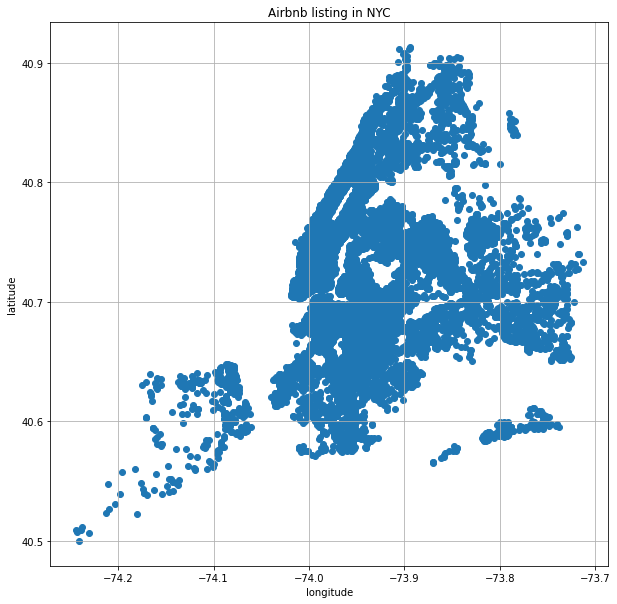

In [51]:
plt.rcParams['figure.figsize'] = (10,10)
plt.grid()
plt.scatter(x=df['longitude'],y=df['latitude'])
plt.title('Airbnb listing in NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()



In [52]:
cdf=df.copy()

In [53]:
cdf.drop(['last_review'], axis=1,inplace=True)

In [54]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [55]:
cdf['name'].fillna('No Name',inplace=True)
cdf['host_name'].fillna('NO_NAME',inplace=True)
cdf.dropna(inplace=True)

In [56]:
cdf.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [57]:
cdf.shape

(38843, 15)

In [58]:
Host_by_location=cdf.groupby(['neighbourhood_group'])['id'].count()
Host_by_location

neighbourhood_group
Bronx              876
Brooklyn         16447
Manhattan        16632
Queens            4574
Staten Island      314
Name: id, dtype: int64

Text(0.5, 0, 'Locations')

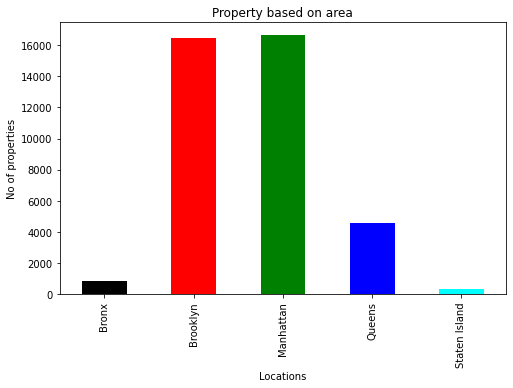

In [62]:
plt.rcParams['figure.figsize'] = (8,5)
Host_by_location.plot(kind='bar',color=['black','red','green','blue','cyan'])
plt.title('Property based on area')
plt.ylabel('No of properties')
plt.xlabel('Locations')


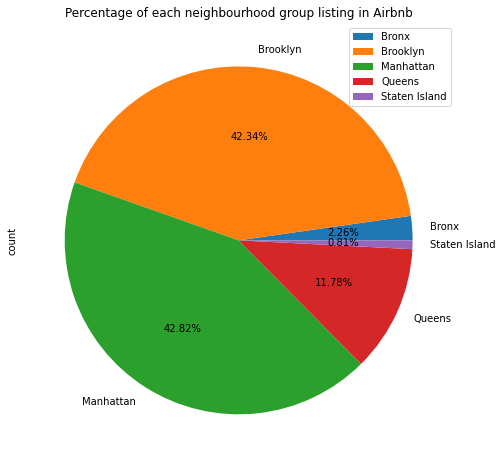

In [65]:
neighbourhood_group_df = pd.DataFrame(Host_by_location)
neighbourhood_group_df.rename(columns={"id":"count"},inplace=True)
fig=neighbourhood_group_df.plot.pie(y='count',autopct='%.2f%%',title='Percentage of each neighbourhood group listing in Airbnb',figsize=(8,8))

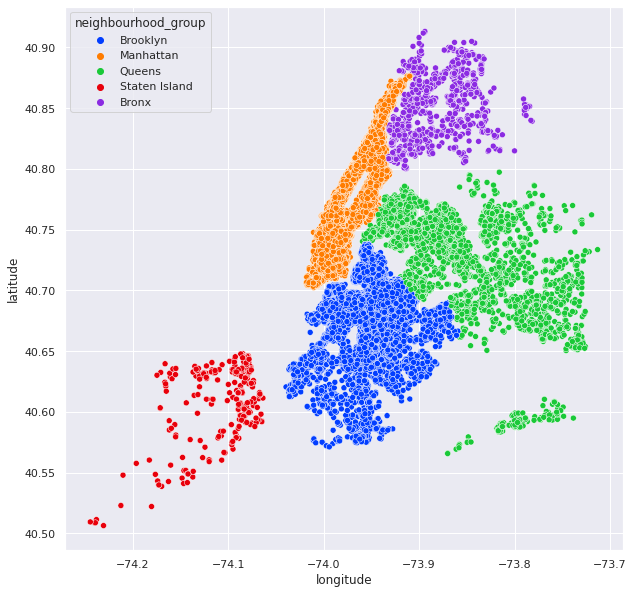

In [67]:
sns.set_theme()
plt.rcParams['figure.figsize'] = (10,10)
sns.scatterplot(x='longitude',y='latitude',data=cdf,hue='neighbourhood_group',palette='bright')

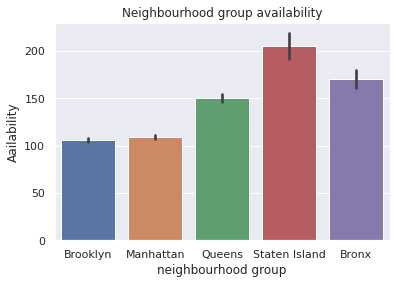

In [68]:
plt.figure(figsize=(6,4))
sns.barplot(x='neighbourhood_group',y='availability_365',data=cdf)
plt.title('Neighbourhood group availability')
plt.ylabel('Aailability')
plt.xlabel('neighbourhood group')
plt.show()

**Room Type**


In [69]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [70]:
TypesOfProperty=cdf.groupby(['room_type'])['id'].count()
TypesOfProperty

room_type
Entire home/apt    20332
Private room       17665
Shared room          846
Name: id, dtype: int64

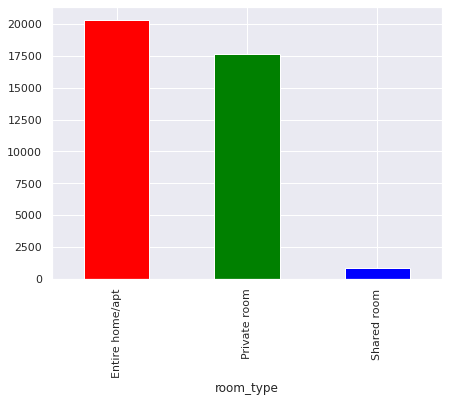

In [71]:
plt.rcParams['figure.figsize']=(7,5)
TypesOfProperty.plot(kind='bar',color=['red','green','blue'])

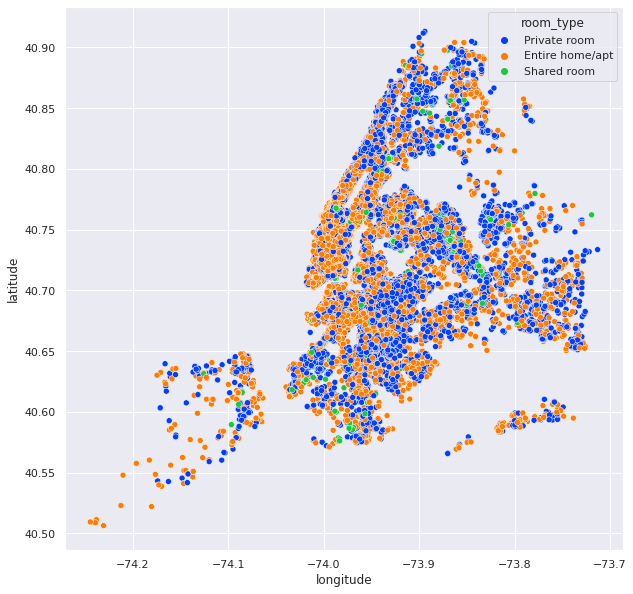

In [72]:
sns.set_theme()
plt.rcParams['figure.figsize']=(10,10)
sns.scatterplot(x='longitude',y='latitude',data=cdf,hue='room_type',palette='bright')

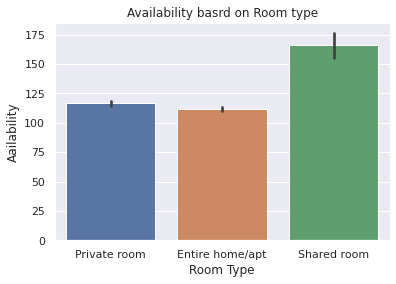

In [73]:
plt.figure(figsize=(6,4))
sns.barplot(x='room_type',y='availability_365',data=cdf)
plt.title('Availability basrd on Room type')
plt.ylabel('Aailability')
plt.xlabel('Room Type')
plt.show()

In [74]:
property_based_on_location=cdf.groupby(['neighbourhood_group','room_type'])['id'].count().unstack()
property_based_on_location

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,309,524,43
Brooklyn,8164,7993,290
Manhattan,9967,6309,356
Queens,1742,2680,152
Staten Island,150,159,5


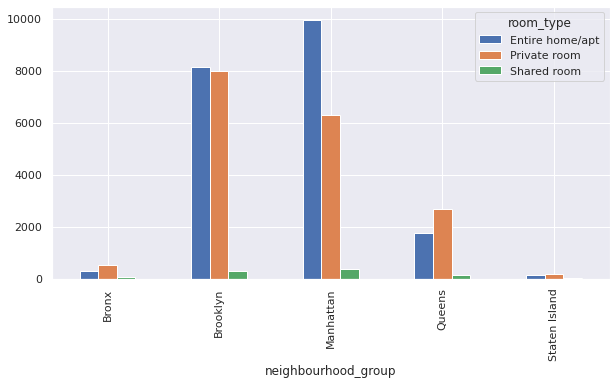

In [75]:
plt.rcParams['figure.figsize'] = (10,5)
property_based_on_location.plot(kind='bar')

**Neighbourhood**

In [76]:
df['neighbourhood'].nunique()

221

Text(0, 0.5, 'Number of listed properties')

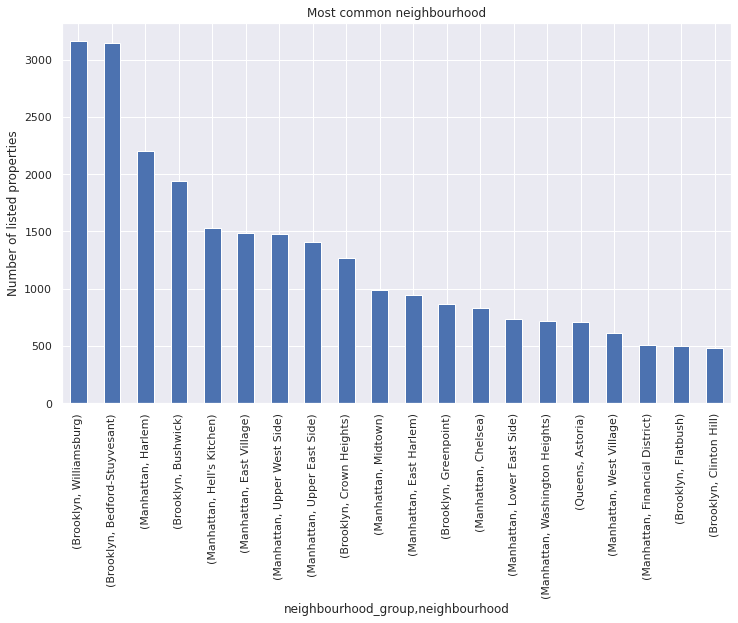

In [77]:
df_common=cdf.groupby(['neighbourhood_group'])['neighbourhood'].value_counts()
df_common=df_common.sort_values(axis=0, ascending=False).head(20)
plt.rcParams['figure.figsize'] = (12, 7)
df_common.plot.bar()
plt.title('Most common neighbourhood')
plt.ylabel('Number of listed properties')

Text(0.5, 0, 'neighbourhood')

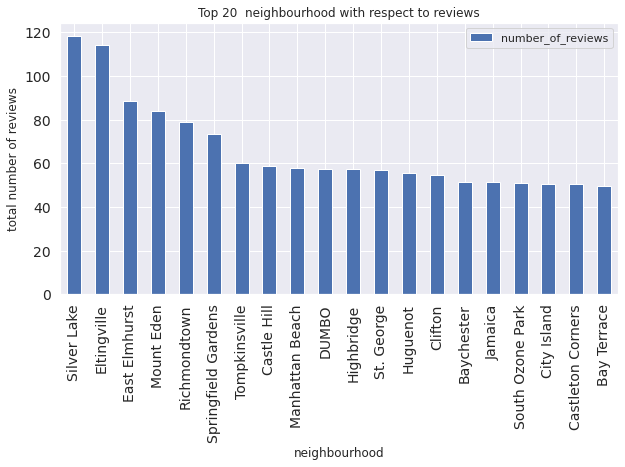

In [78]:
df_reviews=cdf.groupby(['neighbourhood'])['number_of_reviews'].mean().reset_index()
df_reviews=df_reviews.sort_values(['number_of_reviews'],ascending=False).head(20)
df_reviews=df_reviews.set_index('neighbourhood')
df_reviews.plot.bar(figsize = (10,5),fontsize = 14)
plt.title('Top 20  neighbourhood with respect to reviews')
plt.ylabel('total number of reviews')
plt.xlabel('neighbourhood')

Text(0.5, 0, 'Neighbourhood')

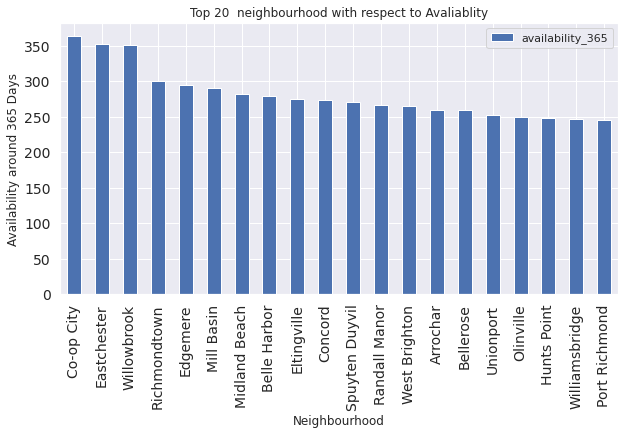

In [79]:
df_reviews=cdf.groupby(['neighbourhood'])['availability_365'].mean().reset_index()
df_reviews=df_reviews.set_index('neighbourhood')
df_reviews=df_reviews.sort_values(['availability_365'],ascending=False).head(20)
df_reviews.plot.bar(figsize = (10,5),fontsize = 14)
plt.title('Top 20  neighbourhood with respect to Avaliablity')
plt.ylabel('Availability around 365 Days')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

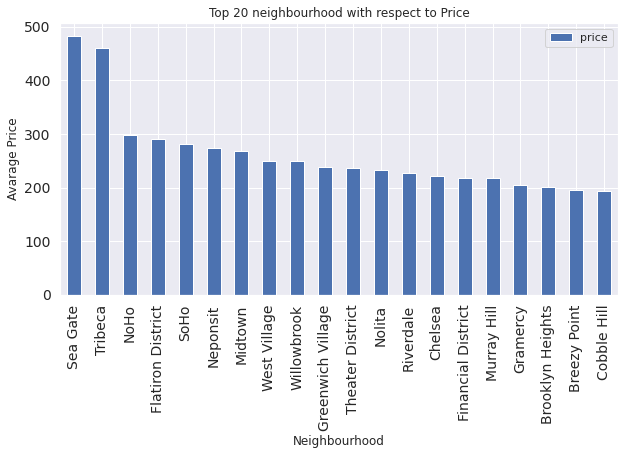

In [80]:
df_reviews=cdf.groupby(['neighbourhood'])['price'].mean().reset_index()
df_reviews=df_reviews.sort_values(['price'],ascending=False).head(20)
df_reviews=df_reviews.set_index('neighbourhood')
df_reviews.plot.bar(figsize = (10,5),fontsize = 14)
plt.title('Top 20 neighbourhood with respect to Price')
plt.ylabel('Avarage Price')
plt.xlabel('Neighbourhood')

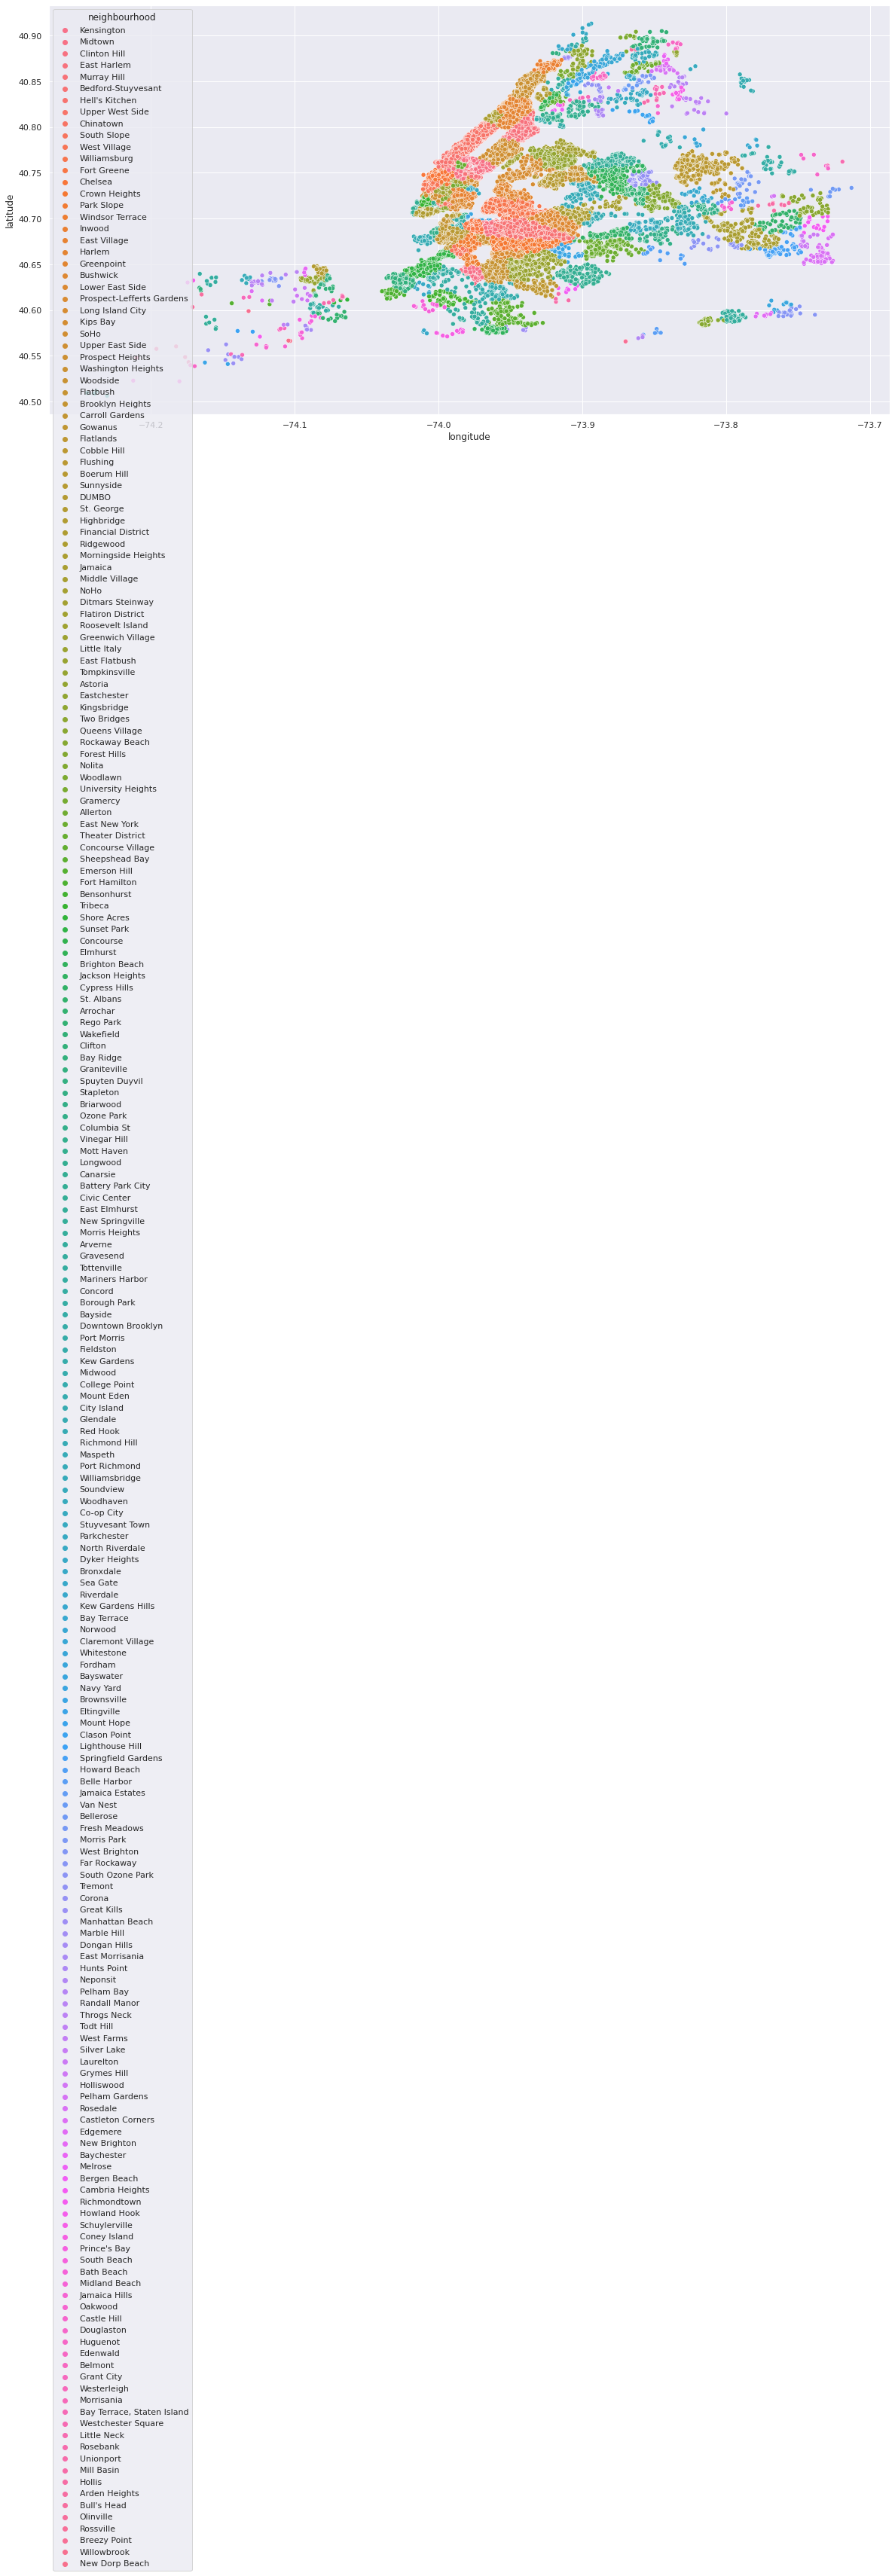

In [81]:
sns.set_theme()
plt.rcParams['figure.figsize'] = (20,10)
sns.scatterplot(x='longitude', y='latitude',data=cdf, hue='neighbourhood')

**Price**

In [82]:
len(cdf[cdf['price']==0])

10

In [83]:
cdf[cdf['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,0.26,6,139


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


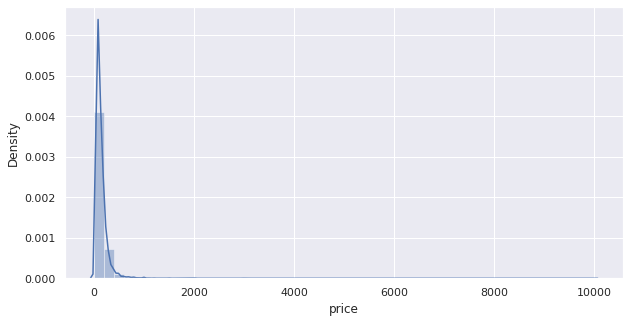

In [84]:
plt.rcParams['figure.figsize'] = (10, 5)
ax=sns.distplot(cdf['price'] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


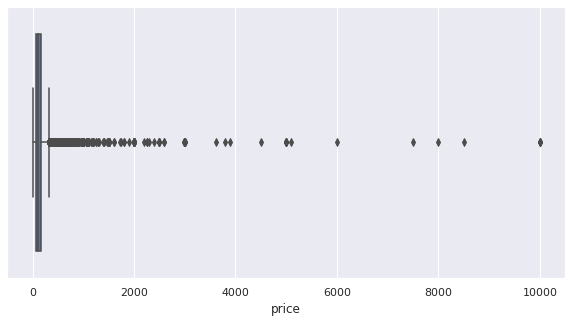

In [85]:
plt.rcParams['figure.figsize'] = (10, 5)
ax=sns.boxplot(cdf['price'])

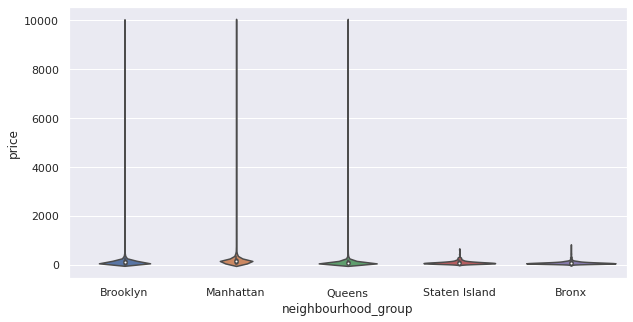

In [86]:
plt.rcParams['figure.figsize'] = (10, 5)
ax= sns.violinplot(x='neighbourhood_group',y='price',data=cdf)

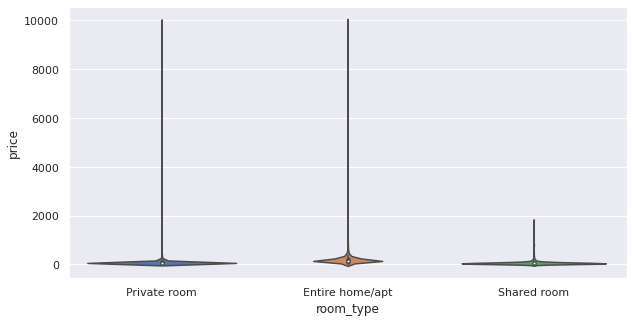

In [87]:
ax= sns.violinplot(x='room_type',y='price',data=cdf)

**Average Price in each neighbourhood**

In [88]:
neighbourhood_group_avg_price = cdf.groupby("neighbourhood_group", as_index=False).agg({"price": "mean"})
neighbourhood_group_avg_price.rename(columns={"price":"avg price"},inplace=True)
neighbourhood_group_avg_price

,neighbourhood_group,avg price
0,Bronx,79.553653
1,Brooklyn,121.448714
2,Manhattan,180.052489
3,Queens,95.762571
4,Staten Island,89.964968


**Price variation for different Room types** 

In [89]:
room_avg_price = cdf.groupby("room_type", as_index=False).agg({"price": "mean"})
room_avg_price.rename(columns={"price":"avg price"},inplace=True)
room_avg_price

,room_type,avg price
0,Entire home/apt,196.294068
1,Private room,83.981093
2,Shared room,63.213948


**From all above graph we can see the outliers of price for listings we going to remove the outliers detection by using Inter Qrartile Range(IQR) method.**

In [90]:
percentile_q1 = np.percentile(cdf['price'],25)
print(percentile_q1)
percentile_q2 = np.percentile(cdf['price'],50)
print(percentile_q2)
percentile_q3 = np.percentile(cdf['price'],75)
print(percentile_q3)

69.0
101.0
170.0


In [91]:
IQR=percentile_q3-percentile_q1
print(IQR)
lower_side_outlier=percentile_q1-(1.5)*IQR
print(lower_side_outlier)
upper_side_outlier=percentile_q3+(1.5)*IQR
print(upper_side_outlier)

101.0
-82.5
321.5


In [92]:
new_data=cdf[(cdf['price']>lower_side_outlier) & (cdf['price']<upper_side_outlier )]
len(new_data)

36766

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


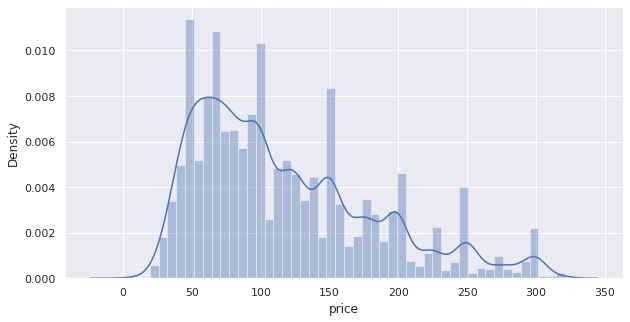

In [93]:
plt.rcParams['figure.figsize'] = (10, 5)
ax=sns.distplot(new_data['price'] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


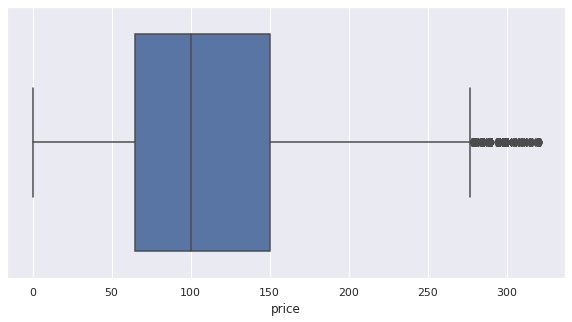

In [94]:
plt.rcParams['figure.figsize'] = (10, 5)
ax=sns.boxplot(new_data['price'])

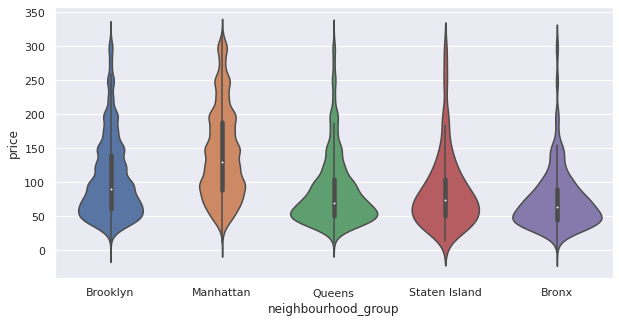

In [95]:
plt.rcParams['figure.figsize'] = (10, 5)
ax= sns.violinplot(x='neighbourhood_group',y='price',data=new_data)

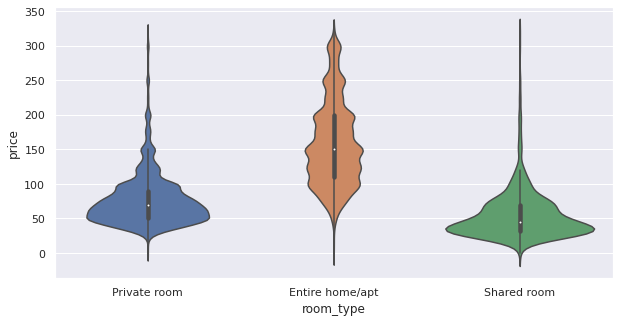

In [96]:
ax= sns.violinplot(x='room_type',y='price',data=new_data)

**Number Of Reviews**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


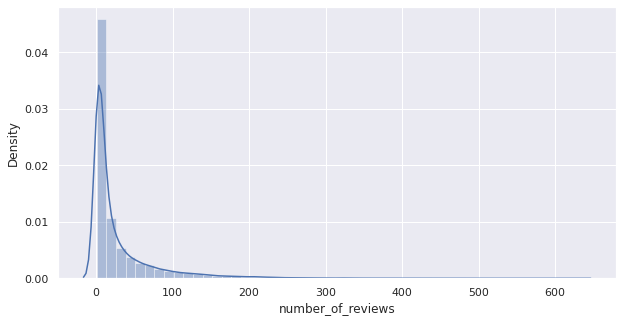

In [97]:
reviews=cdf['number_of_reviews']
sns.distplot(reviews, hist=True)

In [98]:
Properties_having_reviews_1_to_10=cdf['number_of_reviews'].value_counts()[0:10]

In [99]:
sum(Properties_having_reviews_1_to_10)

20271

In [100]:
sum(cdf['number_of_reviews'].value_counts()[0:10])

20271

Text(0.5, 0, 'Reviews')

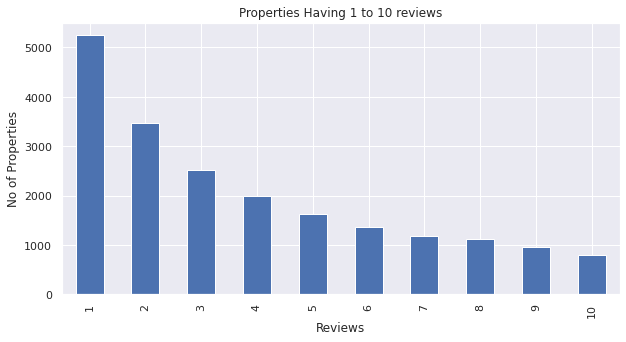

In [101]:
plt.rcParams['figure.figsize'] = (10, 5)
Properties_having_reviews_1_to_10.plot(kind='bar')
plt.title('Properties Having 1 to 10 reviews')
plt.ylabel('No of Properties')
plt.xlabel('Reviews')

In [102]:
cdf['number_of_reviews'].sort_values()[-10:]

471      480
4870     488
20403    510
1879     540
10623    543
13495    576
2015     594
2030     597
2031     607
11759    629
Name: number_of_reviews, dtype: int64

In [103]:
rev_data=cdf.sort_values(by='number_of_reviews',ascending=False)[['name','neighbourhood_group','number_of_reviews','host_name','room_type']][0:10].reset_index()
rev_data

,index,name,neighbourhood_group,number_of_reviews,host_name,room_type
0,11759,Room near JFK Queen Bed,Queens,629,Dona,Private room
1,2031,Great Bedroom in Manhattan,Manhattan,607,Jj,Private room
2,2030,Beautiful Bedroom in Manhattan,Manhattan,597,Jj,Private room
3,2015,Private Bedroom in Manhattan,Manhattan,594,Jj,Private room
4,13495,Room Near JFK Twin Beds,Queens,576,Dona,Private room
5,10623,Steps away from Laguardia airport,Queens,543,Maya,Private room
6,1879,Manhattan Lux Loft.Like.Love.Lots.Look !,Manhattan,540,Carol,Private room
7,20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,Queens,510,Danielle,Private room
8,4870,Private brownstone studio Brooklyn,Brooklyn,488,Asa,Entire home/apt
9,471,LG Private Room/Family Friendly,Brooklyn,480,Wanda,Private room


**Minimun Nights**

In [104]:
Minimum_nights_by_host=cdf['minimum_nights']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Denisty plot for Minimum nights')

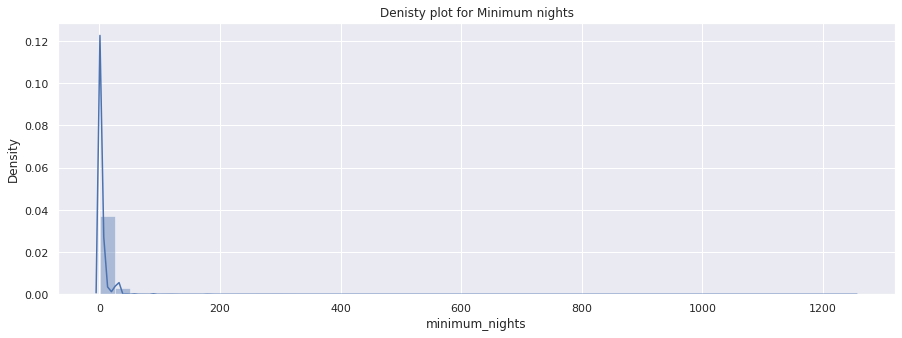

In [105]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(Minimum_nights_by_host, hist=True)
plt.title('Denisty plot for Minimum nights')

Text(0.5, 0, 'Minimum_nights')

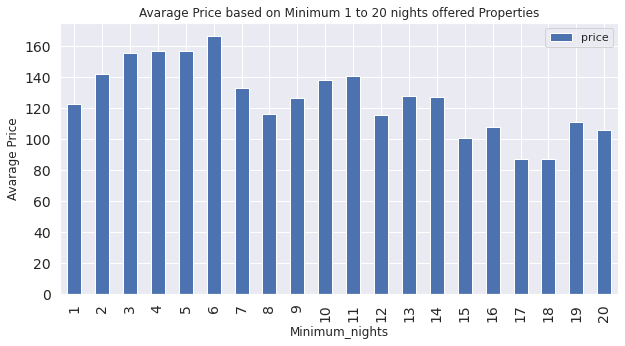

In [106]:
df_reviews=cdf.groupby(['minimum_nights'])['price'].mean().reset_index()
df_reviews=df_reviews.sort_values(['minimum_nights'],ascending=True).head(20)
df_reviews=df_reviews.set_index('minimum_nights')
df_reviews.plot.bar(figsize = (10,5),fontsize = 14)
plt.title('Avarage Price based on Minimum 1 to 20 nights offered Properties')
plt.ylabel('Avarage Price')
plt.xlabel('Minimum_nights')

**Host Id and Host Name**

In [107]:
df['host_id'].nunique()

37457

In [108]:
df['host_name'].nunique()

11452

In [109]:
Host_having_multipul_property_listing=cdf['host_id'].value_counts()[:20]

Text(0.5, 0, 'Host Ids')

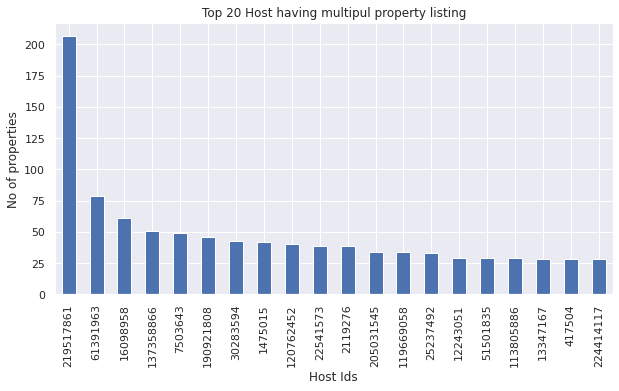

In [110]:
plt.rcParams['figure.figsize'] = (10, 5)
Host_having_multipul_property_listing.plot(kind='bar')
plt.title('Top 20 Host having multipul property listing')
plt.ylabel('No of properties')
plt.xlabel('Host Ids')

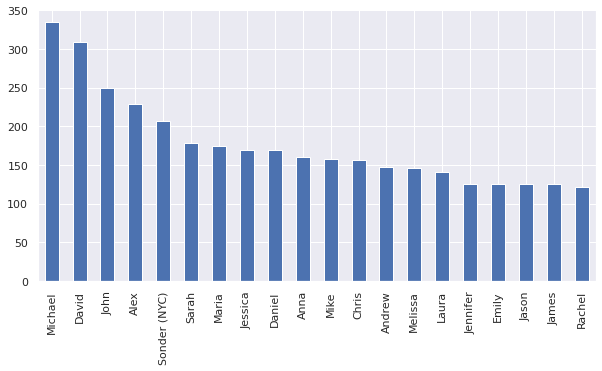

In [111]:
a=cdf['host_name'].value_counts()[:20]
a.plot(kind='bar')

**Avaliablity 365**

In [112]:
df['availability_365'].max()

365

In [113]:
df[df['availability_365']==df['availability_365'].max()].count()

id                                1295
name                              1294
host_id                           1295
host_name                         1295
neighbourhood_group               1295
neighbourhood                     1295
latitude                          1295
longitude                         1295
room_type                         1295
price                             1295
minimum_nights                    1295
number_of_reviews                 1295
last_review                        841
reviews_per_month                  841
calculated_host_listings_count    1295
availability_365                  1295
dtype: int64

In [114]:
df[df['availability_365']==df['availability_365'].max()]['id'].nunique()

1295

In [115]:
df['availability_365'].min()

0

In [116]:
df[df['availability_365']==df['availability_365'].min()].count()

id                                17533
name                              17521
host_id                           17533
host_name                         17520
neighbourhood_group               17533
neighbourhood                     17533
latitude                          17533
longitude                         17533
room_type                         17533
price                             17533
minimum_nights                    17533
number_of_reviews                 17533
last_review                       12688
reviews_per_month                 12688
calculated_host_listings_count    17533
availability_365                  17533
dtype: int64

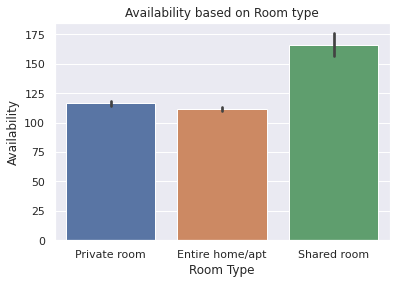

In [117]:
plt.figure(figsize=(6,4))
sns.barplot(x='room_type', y='availability_365', data=cdf)
plt.title('Availability based on Room type')
plt.ylabel('Availability')
plt.xlabel('Room Type')
plt.show()

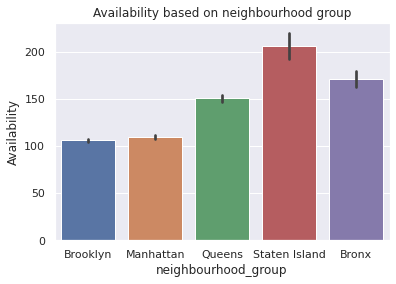

In [118]:
plt.figure(figsize=(6,4))
sns.barplot(x='neighbourhood_group', y='availability_365', data=cdf)
plt.title('Availability based on neighbourhood group')
plt.ylabel('Availability')
plt.xlabel('neighbourhood_group')
plt.show()

**Correlation**

In [119]:
df.drop('id',axis=1,inplace=True)

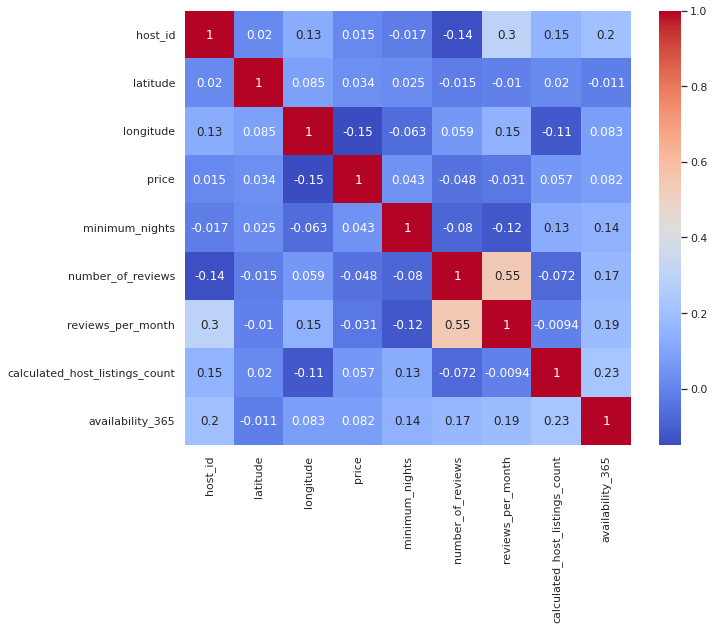

In [120]:
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')